# Individual Algo Strong Scaling (input types on same plots)

In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [2]:
tk = th.Thicket.from_caliperreader(glob("cali_files/roee/*.cali"))
tk.dataframe = tk.dataframe.drop(["nid", "spot.channel", "Total time"], axis=1)
#tk.dataframe = tk.dataframe.drop(["spot.channel", "Total time"], axis=1)

In [3]:
# Performance data
tk.dataframe

Min time/rank  \
node                                              profile                     
{'name': 'main', 'type': 'function'}              7889210        284.700548   
                                                  12367584        15.644663   
                                                  35225943         0.024514   
                                                  35646464         2.625594   
                                                  41684191         7.619610   
                                                  52788373      1980.302303   
                                                  55578322         1.388426   
                                                  85913000         0.754029   
                                                  91204238         0.679221   
                                                  114393497        2.948187   
                                                  129941946        5.164360   
                                                  154171129        1.144371   
                                                  162888901     3328.373696   
                                                  234134295        9.533900   
                                                  264533472      267.523447   
                                                  399583654      207.028604   
                                                  431974227      292.539192   
                                                  442998178     2371.954269   
                                                  459842825     4568.022432   
                                                  461579471     2594.477296   
                                                  552341693        1.141405   
                                                  576967359      382.772719   
                                                  595592607        2.667785   
                                                  693901349        2.296861   
                                                  737222405     2470.648388   
                                                  794419592        0.044404   
                                                  803176683        2.256454   
                                                  941853197        2.262650   
                                                  944418166       10.151916   
                                                  1025902469       2.321344   
                                                  1093749272      17.693142   
                                                  1136933894     209.905805   
                                                  1211359881       0.072596   
                                                  1247997927    3429.871880   
                                                  1254725690    3224.808611   
                                                  1275753510       0.001669   
                                                  1281487018    4720.204189   
                                                  1301913435       0.802393   
                                                  1314796006      18.263462   
                                                  1319210817      17.956176   
                                                  1371600987      12.969012   
                                                  1385773059       2.578823   
                                                  1398480090      17.140277   
                                                  1417248272    3532.919358   
                                                  1435459564       0.292084   
                                                  1439231101       0.899907   
                                                  1472774536       2.431903   
                                                  1522765513      65.925327   
                                                  1531267446       2.703449   
                                 

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [4]:
tk.statsframe.dataframe["time"]= 1
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
├─ 1.000 comm
│  └─ 1.000 comm_small
│     ├─ 1.000 MPI_Recv
│     └─ 1.000 MPI_Send
├─ 1.000 comp
│  ├─ 1.000 comp_large
│  └─ 1.000 comp_small
├─ 1.000 correctness_check
└─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [5]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:time.variance,correctness,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_procs,num_threads,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,,,
7889210,2.11.0-dev,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,262144-2-3-bubble.cali,true,success,1700071209,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble_sort, 262144, 3]",c,Bubble Sort(Odd/Even),MPI,int,4,262144,Random,2,0,14,Handwritten
12367584,2.11.0-dev,1024,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,262144-1024-1-bubble.cali,true,success,1700078542,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble_sort, 262144, 1]",c,Bubble Sort(Odd/Even),MPI,int,4,262144,ReverseSorted,1024,0,14,Handwritten
35225943,2.11.0-dev,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,262144-32-0-bubble.cali,true,success,1700078301,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble_sort, 262144, 0]",c,Bubble Sort(Odd/Even),MPI,int,4,262144,Sorted,32,0,14,Handwritten
35646464,2.11.0-dev,1024,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,65536-1024-0-bubble.cali,true,success,1700077739,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble_sort, 65536, 0]",c,Bubble Sort(Odd/Even),MPI,int,4,65536,Sorted,1024,0,14,Handwritten
41684191,2.11.0-dev,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,65536-4-2-bubble.cali,true,success,1700071181,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble_sort, 65536, 2]",c,Bubble Sort(Odd/Even),MPI,int,4,65536,1 perturbed,4,0,14,Handwritten
52788373,2.11.0-dev,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,1048576-4-2-bubble.cali,true,success,1700072411,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble_sort, 1048576, 2]",c,Bubble Sort(Odd/Even),MPI,int,4,1048576,1 perturbed,4,0,14,Handwritten
55578322,2.11.0-dev,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,65536-32-3-bubble.cali,true,success,1700077798,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble_sort, 65536, 3]",c,Bubble Sort(Odd/Even),MPI,int,4,65536,Random,32,0,14,Handwritten
85913000,2.11.0-dev,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,65536-64-2-bubble.cali,true,success,1700077784,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble_sort, 65536, 2]",c,Bubble Sort(Odd/Even),MPI,int,4,65536,1 perturbed,64,0,14,Handwritten
91204238,2.11.0-dev,512,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,65536-512-0-bubble.cali,true,success,1700077738,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble_sort, 65536, 0]",c,Bubble Sort(Odd/Even),MPI,int,4,65536,Sorted,512,0,14,Handwritten


In [6]:
gb = tk.groupby("InputSize")
print(gb.keys())
allthickets = list(gb.values())
input65536 = gb[65536].groupby("InputType")
input262144 = gb[262144].groupby("InputType")
input1048576 = gb[1048576].groupby("InputType")
input4194304 = gb[4194304].groupby("InputType")
input16777216 = gb[16777216].groupby("InputType")
input67108864 = gb[67108864].groupby("InputType")
input268435456 = gb[268435456].groupby("InputType")

# inputsorted = gb['sorted'].groupby("InputType")
# inputreversed = gb['reversed'].groupby("InputSize")
# inputperturbed = gb['1 perturbed'].groupby("InputSize")
# inputrandom = gb['random'].groupby("InputSize")

7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2ad2dac71e80>, 262144: <thicket.thicket.Thicket object at 0x2ad2dacf00d0>, 1048576: <thicket.thicket.Thicket object at 0x2ad2dac0b7f0>, 4194304: <thicket.thicket.Thicket object at 0x2ad2dadee7f0>, 16777216: <thicket.thicket.Thicket object at 0x2ad2dacdfd30>, 67108864: <thicket.thicket.Thicket object at 0x2ad2dac5c100>, 268435456: <thicket.thicket.Thicket object at 0x2ad2dac7eee0>}
dict_keys([65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456])
4  thickets created...
{'1 perturbed': <thicket.thicket.Thicket object at 0x2ad2dae865b0>, 'Random': <thicket.thicket.Thicket object at 0x2ad2dad55e20>, 'ReverseSorted': <thicket.thicket.Thicket object at 0x2ad2daebabb0>, 'Sorted': <thicket.thicket.Thicket object at 0x2ad2dad9f100>}
4  thickets created...
{'1 perturbed': <thicket.thicket.Thicket object at 0x2ad2dacce130>, 'Random': <thicket.thicket.Thicket object at 0x2ad2dad52df0>, 'ReverseSorted': <thicket.thicket.T

Compose these 3 groups column-wise to get a holistic view of the data

In [7]:
ctk65536 = th.Thicket.concat_thickets(
    thickets=list(input65536.values()),
    headers=list(input65536.keys()),
    axis="columns",
    metadata_key="num_procs"
)

ctk262144 = th.Thicket.concat_thickets(
    thickets=list(input262144.values()),
    headers=list(input262144.keys()),
    axis="columns",
    metadata_key="num_procs"
)

ctk1048576 = th.Thicket.concat_thickets(
    thickets=list(input1048576.values()),
    headers=list(input1048576.keys()),
    axis="columns",
    metadata_key="num_procs"
)

ctk4194304 = th.Thicket.concat_thickets(
    thickets=list(input4194304.values()),
    headers=list(input4194304.keys()),
    axis="columns",
    metadata_key="num_procs"
)
ctk16777216 = th.Thicket.concat_thickets(
    thickets=list(input16777216.values()),
    headers=list(input16777216.keys()),
    axis="columns",
    metadata_key="num_procs"
)
ctk67108864 = th.Thicket.concat_thickets(
    thickets=list(input67108864.values()),
    headers=list(input67108864.keys()),
    axis="columns",
    metadata_key="num_procs"
)
ctk268435456 = th.Thicket.concat_thickets(
    thickets=list(input268435456.values()),
    headers=list(input268435456.keys()),
    axis="columns",
    metadata_key="num_procs"
)



allctk = []
allctk.append(ctk65536)
allctk.append(ctk262144)
allctk.append(ctk1048576)
allctk.append(ctk4194304)
allctk.append(ctk16777216)
allctk.append(ctk67108864)
allctk.append(ctk268435456)

In [8]:
for ctk in allctk:
    display(ctk.dataframe)

1 perturbed  \
                                                            Min time/rank   
node                                              num_procs                 
{'name': 'main', 'type': 'function'}              2             13.073459   
                                                  4              7.619610   
                                                  8              6.056825   
                                                  16             1.300011   
                                                  32             0.606475   
                                                  64             0.754029   
                                                  128            2.262650   
                                                  256            5.114793   
                                                  512            0.812010   
                                                  1024           2.455428   
{'name': 'comm', 'type': 'function'}              2              0.574604   
                                                  4              2.387787   
                                                  8              3.543875   
                                                  16             1.086003   
                                                  32             0.536117   
                                                  64             0.671121   
                                                  128            1.966345   
                                                  256            5.052707   
                                                  512            0.787260   
                                                  1024           2.413038   
{'name': 'comm_small', 'type': 'function'}        2              0.574578   
                                                  4              2.387749   
                                                  8              3.543801   
                                                  16             1.085820   
                                                  32             0.535739   
                                                  64             0.664476   
                                                  128            1.964903   
                                                  256            4.981751   
                                                  512            0.779333   
                                                  1024           2.398221   
{'name': 'MPI_Recv', 'type': 'function'}          2              0.574469   
                                                  4              2.387577   
                                                  8              3.543598   
                                                  16             0.833802   
                                                  32             0.172396   
                                                  64             0.451195   
                                                  128            0.733342   
                                                  256            2.273747   
                                                  512            0.406038   
                                                  1024           1.543987   
{'name': 'MPI_Send', 'type': 'function'}          2              0.000085   
                                                  4              0.000095   
                                                  8              0.000084   
                                                  16             0.000094   
                                                  32             0.000108   
                                                  64             0.000176   
                                                  128            0.000311   
                                                  256            0.000595   
                                                  512            0.001161   
                                                  1024    

1 perturbed  \
                                                            Min time/rank   
node                                              num_procs                 
{'name': 'main', 'type': 'function'}              2            209.905805   
                                                  4            122.053282   
                                                  8             96.098939   
                                                  16            20.691969   
                                                  32             9.533900   
                                                  64             9.314086   
                                                  128            9.918773   
                                                  256           11.295401   
                                                  512            5.469633   
                                                  1024           5.966356   
{'name': 'comm', 'type': 'function'}              2              3.248948   
                                                  4             37.328871   
                                                  8             54.016361   
                                                  16            15.875515   
                                                  32             8.691108   
                                                  64             8.879659   
                                                  128            9.694656   
                                                  256           11.015257   
                                                  512            5.403394   
                                                  1024           5.922832   
{'name': 'comm_small', 'type': 'function'}        2              3.248918   
                                                  4             37.328830   
                                                  8             54.016277   
                                                  16            15.875380   
                                                  32             8.690728   
                                                  64             8.878925   
                                                  128            9.693186   
                                                  256           10.989850   
                                                  512            5.397075   
                                                  1024           5.910140   
{'name': 'MPI_Recv', 'type': 'function'}          2              3.248688   
                                                  4             37.328587   
                                                  8             54.015968   
                                                  16            15.874978   
                                                  32             6.496554   
                                                  64             5.621079   
                                                  128            1.825060   
                                                  256            4.935791   
                                                  512            1.027638   
                                                  1024           1.706859   
{'name': 'MPI_Send', 'type': 'function'}          2              0.000192   
                                                  4              0.000178   
                                                  8              0.000190   
                                                  16             0.000166   
                                                  32             0.000153   
                                                  64             0.000222   
                                                  128            0.000340   
                                                  256            0.000616   
                                                  512            0.001168   
                                                  1024    

1 perturbed  \
                                                            Min time/rank   
node                                              num_procs                 
{'name': 'main', 'type': 'function'}              2           3429.871880   
                                                  4           1980.302303   
                                                  8           1543.772902   
                                                  16          1332.807527   
                                                  32          1228.415144   
                                                  64          1171.770822   
                                                  128          288.129497   
                                                  256          280.477519   
                                                  512          137.348549   
                                                  1024         127.698702   
{'name': 'comm', 'type': 'function'}              2             39.598799   
                                                  4            570.313548   
                                                  8            842.002076   
                                                  16          1013.567303   
                                                  32          1088.373428   
                                                  64          1117.837519   
                                                  128          281.477922   
                                                  256          277.278718   
                                                  512          136.091941   
                                                  1024         126.036960   
{'name': 'comm_small', 'type': 'function'}        2             39.598760   
                                                  4            570.313501   
                                                  8            842.001995   
                                                  16          1013.567148   
                                                  32          1088.373144   
                                                  64          1117.781499   
                                                  128          281.476451   
                                                  256          277.275720   
                                                  512          136.085991   
                                                  1024         125.984886   
{'name': 'MPI_Recv', 'type': 'function'}          2             39.598150   
                                                  4            570.312725   
                                                  8            842.001283   
                                                  16          1013.566276   
                                                  32          1088.372056   
                                                  64           985.167816   
                                                  128          134.544759   
                                                  256           43.640043   
                                                  512            5.726344   
                                                  1024           4.529328   
{'name': 'MPI_Send', 'type': 'function'}          2              0.000573   
                                                  4              0.000698   
                                                  8              0.000570   
                                                  16             0.000527   
                                                  32             0.000480   
                                                  64             0.000393   
                                                  128            0.000503   
                                                  256            0.000750   
                                                  512            0.001314   
                                                  1024    

Sorted  \
                                                            Min time/rank   
node                                              num_procs                 
{'name': 'main', 'type': 'function'}              2              0.056925   
                                                  4              0.080182   
                                                  8              0.076999   
                                                  16             0.069699   
                                                  32             0.072596   
                                                  64             0.070389   
                                                  128            1.255984   
                                                  256            4.638044   
                                                  512           10.316530   
                                                  1024           1.865128   
{'name': 'comm', 'type': 'function'}              2              0.006602   
                                                  4              0.025192   
                                                  8              0.030807   
                                                  16             0.039620   
                                                  32             0.033240   
                                                  64             0.031456   
                                                  128            0.991721   
                                                  256            4.506608   
                                                  512           10.019768   
                                                  1024           1.782231   
{'name': 'comm_small', 'type': 'function'}        2              0.006583   
                                                  4              0.025159   
                                                  8              0.030737   
                                                  16             0.039411   
                                                  32             0.032857   
                                                  64             0.030738   
                                                  128            0.950075   
                                                  256            4.503540   
                                                  512            9.619207   
                                                  1024           1.766253   
{'name': 'MPI_Recv', 'type': 'function'}          2              0.004195   
                                                  4              0.023817   
                                                  8              0.023861   
                                                  16             0.021533   
                                                  32             0.023204   
                                                  64             0.021102   
                                                  128            0.098599   
                                                  256            1.843262   
                                                  512            2.475971   
                                                  1024           1.121177   
{'name': 'MPI_Send', 'type': 'function'}          2              0.002356   
                                                  4              0.001296   
                                                  8              0.001236   
                                                  16             0.001045   
                                                  32             0.000709   
                                                  64             0.000609   
                                                  128            0.000777   
                                                  256            0.001015   
                                                  512            0.001566   
                                                  1024         

Sorted  \
                                                            Min time/rank   
node                                              num_procs                 
{'name': 'main', 'type': 'function'}              2              0.224419   
                                                  4              0.298790   
                                                  8              0.595360   
                                                  16             1.294479   
                                                  32             2.564809   
                                                  64             3.868689   
{'name': 'comm', 'type': 'function'}              2              0.023035   
                                                  4              0.078119   
                                                  8              0.202731   
                                                  16             0.575165   
                                                  32             1.168811   
                                                  64             2.001097   
{'name': 'comm_small', 'type': 'function'}        2              0.023013   
                                                  4              0.078082   
                                                  8              0.202656   
                                                  16             0.575019   
                                                  32             1.168523   
                                                  64             2.000533   
{'name': 'MPI_Recv', 'type': 'function'}          2              0.015325   
                                                  4              0.071956   
                                                  8              0.193260   
                                                  16             0.441536   
                                                  32             0.872065   
                                                  64             0.757329   
{'name': 'MPI_Send', 'type': 'function'}          2              0.007641   
                                                  4              0.006062   
                                                  8              0.009272   
                                                  16             0.008304   
                                                  32             0.006898   
                                                  64             0.006082   
{'name': 'comp', 'type': 'function'}              2              0.072983   
                                                  4              0.074109   
                                                  8              0.156914   
                                                  16             0.274202   
                                                  32             0.480948   
                                                  64             0.378928   
{'name': 'comp_large', 'type': 'function'}        2              0.073195   
                                                  4              0.073024   
                                                  8              0.123127   
                                                  16             0.229860   
                                                  32             0.359593   
                                                  64             0.276902   
{'name': 'comp_small', 'type': 'function'}        2              0.072946   
                                                  4              0.072887   
                                                  8              0.123936   
                                                  16             0.192508   
                                                  32             0.287891   
                                                  64             0.256845   
{'name': 'correctness_check', 'type': 'function'} 2              0.022056   
                                                  4            

Sorted  \
                                                            Min time/rank   
node                                              num_procs                 
{'name': 'main', 'type': 'function'}              2              0.893507   
                                                  4              1.141405   
                                                  8              2.256454   
                                                  16             4.403630   
                                                  32             9.126755   
                                                  64            15.518905   
{'name': 'comm', 'type': 'function'}              2              0.090032   
                                                  4              0.257947   
                                                  8              0.772668   
                                                  16             1.719551   
                                                  32             3.911038   
                                                  64             6.704726   
{'name': 'comm_small', 'type': 'function'}        2              0.090012   
                                                  4              0.257906   
                                                  8              0.772585   
                                                  16             1.719403   
                                                  32             3.910739   
                                                  64             6.703855   
{'name': 'MPI_Recv', 'type': 'function'}          2              0.063189   
                                                  4              0.233774   
                                                  8              0.702373   
                                                  16             1.452693   
                                                  32             3.228330   
                                                  64             4.465945   
{'name': 'MPI_Send', 'type': 'function'}          2              0.026781   
                                                  4              0.024062   
                                                  8              0.064629   
                                                  16             0.087642   
                                                  32             0.113990   
                                                  64             0.169382   
{'name': 'comp', 'type': 'function'}              2              0.292751   
                                                  4              0.294105   
                                                  8              0.584229   
                                                  16             1.103158   
                                                  32             2.419401   
                                                  64             4.411968   
{'name': 'comp_large', 'type': 'function'}        2              0.291339   
                                                  4              0.292389   
                                                  8              0.565317   
                                                  16             1.094727   
                                                  32             2.320380   
                                                  64             3.911705   
{'name': 'comp_small', 'type': 'function'}        2              0.290639   
                                                  4              0.292564   
                                                  8              0.569774   
                                                  16             1.095209   
                                                  32             2.323507   
                                                  64             3.606040   
{'name': 'correctness_check', 'type': 'function'} 2              0.088334   
                                                  4            

Sorted  \
                                                            Min time/rank   
node                                              num_procs                 
{'name': 'main', 'type': 'function'}              2              3.588849   
                                                  4              4.551473   
                                                  8              8.694964   
                                                  16            17.140277   
                                                  32            33.607990   
                                                  64            65.925327   
{'name': 'comm', 'type': 'function'}              2              0.370215   
                                                  4              1.048927   
                                                  8              2.873536   
                                                  16             6.684301   
                                                  32            13.565610   
                                                  64            27.669022   
{'name': 'comm_small', 'type': 'function'}        2              0.370194   
                                                  4              1.048882   
                                                  8              2.873449   
                                                  16             6.684138   
                                                  32            13.565285   
                                                  64            27.668132   
{'name': 'MPI_Recv', 'type': 'function'}          2              0.264420   
                                                  4              0.948638   
                                                  8              2.654121   
                                                  16             5.574959   
                                                  32            10.879769   
                                                  64            20.225473   
{'name': 'MPI_Send', 'type': 'function'}          2              0.105723   
                                                  4              0.100149   
                                                  8              0.219109   
                                                  16             0.522414   
                                                  32             0.852272   
                                                  64             1.449657   
{'name': 'comp', 'type': 'function'}              2              1.167485   
                                                  4              1.172803   
                                                  8              2.347982   
                                                  16             4.655542   
                                                  32             9.430545   
                                                  64            18.953033   
{'name': 'comp_large', 'type': 'function'}        2              1.171415   
                                                  4              1.170225   
                                                  8              2.329691   
                                                  16             4.664244   
                                                  32             9.277236   
                                                  64            17.908356   
{'name': 'comp_small', 'type': 'function'}        2              1.167439   
                                                  4              1.169815   
                                                  8              2.331530   
                                                  16             4.637574   
                                                  32             9.255311   
                                                  64            18.038836   
{'name': 'correctness_check', 'type': 'function'} 2              0.353201   
                                                  4            

Perform pandas operations to get the table in a desirable format for plotting

In [9]:
for ctk in allctk:
    # Drop unwanted columns
    columns_to_drop = [("node", ""), ("index", ""),]
    ctk.dataframe = ctk.dataframe.reset_index().drop(columns_to_drop, axis=1, errors='ignore')
    # Rename index to remove tuple
    ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])

In [10]:
for ctk in allctk:
    display(ctk.dataframe)

1 perturbed                              \
                            Min time/rank Max time/rank Avg time/rank   
name              num_procs                                             
main              2             13.073459     13.076020     13.074739   
                  4              7.619610      7.625766      7.621448   
                  8              6.056825      8.199127      7.395085   
                  16             1.300011      2.101660      1.753559   
                  32             0.606475      1.090676      0.872983   
                  64             0.754029      1.191195      1.002361   
                  128            2.262650      2.641063      2.454260   
                  256            5.114793      5.487466      5.301001   
                  512            0.812010      1.535927      1.140654   
                  1024           2.455428      4.200161      3.029328   
comm              2              0.574604      8.701551      4.638078   
                  4              2.387787      4.408382      3.883748   
                  8              3.543875      4.520041      4.327644   
                  16             1.086003      1.276998      1.110534   
                  32             0.536117      0.923142      0.583649   
                  64             0.671121      1.098850      0.782550   
                  128            1.966345      2.504311      2.337199   
                  256            5.052707      5.425721      5.241469   
                  512            0.787260      1.501412      1.110259   
                  1024           2.413038      4.166298      2.985660   
comm_small        2              0.574578      8.701536      4.638057   
                  4              2.387749      4.408332      3.883708   
                  8              3.543801      4.519944      4.327555   
                  16             1.085820      1.276869      1.110359   
                  32             0.535739      0.922902      0.583297   
                  64             0.664476      1.098366      0.781506   
                  128            1.964903      2.502871      2.335482   
                  256            4.981751      5.422835      5.237524   
                  512            0.779333      1.495284      1.103588   
                  1024           2.398221      4.153458      2.971026   
MPI_Recv          2              0.574469      8.701354      4.637912   
                  4              2.387577      4.408101      3.876593   
                  8              3.543598      4.519632      4.313134   
                  16             0.833802      1.276612      1.088440   
                  32             0.172396      0.922516      0.563363   
                  64             0.451195      1.097599      0.716105   
                  128            0.733342      2.500280      2.037103   
                  256            2.273747      5.417611      4.842379   
                  512            0.406038      1.484698      0.952462   
                  1024           1.543987      4.108054      2.601240   
MPI_Send          2              0.000085      0.000149      0.000117   
                  4              0.000095      0.000139      0.000113   
                  8              0.000084      0.000184      0.000118   
                  16             0.000094      0.002508      0.000272   
                  32             0.000108      0.000270      0.000167   
                  64             0.000176      0.022525      0.003524   
                  128            0.000311      0.026004      0.003252   
                  256            0.000595      0.062991      0.001703   
                  512            0.001161      0.059016      0.004917   
                  1024           0.002284      0.165643      0.016787   
comp              2              4.373446     12.497711      8.435578   
                  4              1.101046      5.237021      3.195859   
               

1 perturbed                              \
                            Min time/rank Max time/rank Avg time/rank   
name              num_procs                                             
main              2            209.905805    209.905873    209.905839   
                  4            122.053282    122.055900    122.055177   
                  8             96.098939    130.609995    117.694547   
                  16            20.691969     33.674029     28.002179   
                  32             9.533900     17.189410     13.622423   
                  64             9.314086     17.861691     13.726349   
                  128            9.918773     18.467365     14.293898   
                  256           11.295401     18.466750     15.086497   
                  512            5.469633      9.629736      7.885164   
                  1024           5.966356      8.802841      7.813282   
comm              2              3.248948    139.673204     71.461076   
                  4             37.328871     70.082528     61.669360   
                  8             54.016361     70.205274     67.861471   
                  16            15.875515     17.560939     17.319521   
                  32             8.691108     10.546890      8.825802   
                  64             8.879659     12.337437      9.198287   
                  128            9.694656     17.428836     10.191601   
                  256           11.015257     18.094325     11.854179   
                  512            5.403394      9.412175      7.185007   
                  1024           5.922832      8.516741      7.542051   
comm_small        2              3.248918    139.673185     71.461052   
                  4             37.328830     70.082504     61.669314   
                  8             54.016277     70.205232     67.861373   
                  16            15.875380     17.560867     17.319338   
                  32             8.690728     10.546645      8.825441   
                  64             8.878925     12.336929      9.197077   
                  128            9.693186     17.427860     10.188574   
                  256           10.989850     18.092344     11.849142   
                  512            5.397075      9.404868      7.174746   
                  1024           5.910140      8.503215      7.523964   
MPI_Recv          2              3.248688    139.672739     71.460713   
                  4             37.328587     70.082182     61.612396   
                  8             54.015968     70.204907     67.806045   
                  16            15.874978     17.560530     17.274949   
                  32             6.496554     10.546196      8.752183   
                  64             5.621079     12.336037      9.107566   
                  128            1.825060     17.426246      9.871361   
                  256            4.935791     18.088235     11.303184   
                  512            1.027638      9.396926      6.703494   
                  1024           1.706859      8.410116      6.995949   
MPI_Send          2              0.000192      0.000407      0.000299   
                  4              0.000178      0.000382      0.000273   
                  8              0.000190      0.000315      0.000244   
                  16             0.000166      0.002799      0.000409   
                  32             0.000153      0.000488      0.000267   
                  64             0.000222      0.020970      0.002982   
                  128            0.000340      0.046151      0.006642   
                  256            0.000616      0.139030      0.010950   
                  512            0.001168      0.146945      0.016967   
                  1024           0.002324      0.228302      0.027889   
comp              2             70.229052    206.653033    138.441043   
                  4             17.513823     84.721617     51.769250   
               

1 perturbed                              \
                            Min time/rank Max time/rank Avg time/rank   
name              num_procs                                             
main              2           3429.871880   3429.871882   3429.871881   
                  4           1980.302303   1980.302722   1980.302571   
                  8           1543.772902   2105.133819   1894.709695   
                  16          1332.807527   2169.615762   1803.129702   
                  32          1228.415144   2210.461872   1751.213783   
                  64          1171.770822   2271.820557   1738.704633   
                  128          288.129497    580.436972    437.133776   
                  256          280.477519    569.300354    432.081920   
                  512          137.348549    278.769626    208.002254   
                  1024         127.698702    257.537140    194.292224   
comm              2             39.598799   2298.656533   1169.127666   
                  4            570.313548   1135.694938    992.249387   
                  8            842.002076   1128.547323   1088.062360   
                  16          1013.567303   1128.434306   1113.656509   
                  32          1088.373428   1137.178385   1124.212084   
                  64          1117.837519   1274.180840   1146.459458   
                  128          281.477922    447.491654    294.407548   
                  256          277.278718    526.977121    294.854108   
                  512          136.091941    274.436958    144.408663   
                  1024         126.036960    256.665355    142.930522   
comm_small        2             39.598760   2298.656505   1169.127632   
                  4            570.313501   1135.694910    992.249334   
                  8            842.001995   1128.547281   1088.062259   
                  16          1013.567148   1128.434223   1113.655663   
                  32          1088.373144   1137.177975   1124.211560   
                  64          1117.781499   1274.180286   1146.451502   
                  128          281.476451    447.480599    294.400936   
                  256          277.275720    526.975089    294.839155   
                  512          136.085991    274.433049    144.380613   
                  1024         125.984886    256.657483    142.884153   
MPI_Recv          2             39.598150   2298.655001   1169.126575   
                  4            570.312725   1135.693852    992.242063   
                  8            842.001283   1128.536512   1087.872414   
                  16          1013.566276   1128.433435   1112.311397   
                  32          1088.372056   1137.176286   1123.523397   
                  64           985.167816   1274.178195   1143.895781   
                  128          134.544759    447.478248    292.698502   
                  256           43.640043    526.971021    291.676312   
                  512            5.726344    274.425891    140.973256   
                  1024           4.529328    256.638683    135.553325   
MPI_Send          2              0.000573      0.001454      0.001013   
                  4              0.000698      0.024699      0.006759   
                  8              0.000570      0.010753      0.004580   
                  16             0.000527      0.028107      0.003735   
                  32             0.000480      0.042632      0.003002   
                  64             0.000393      0.165678      0.010689   
                  128            0.000503      0.115964      0.013843   
                  256            0.000750      0.249020      0.028086   
                  512            0.001314      0.281432      0.036222   
                  1024           0.002488      0.596519      0.060826   
comp              2           1131.201215   3390.258719   2260.729967   
                  4            282.751498   1409.978268    847.582841   
               

Sorted                              \
                            Min time/rank Max time/rank Avg time/rank   
name              num_procs                                             
main              2              0.056925      0.056953      0.056939   
                  4              0.080182      0.083537      0.082690   
                  8              0.076999      0.084011      0.081604   
                  16             0.069699      0.129821      0.096055   
                  32             0.072596      0.126288      0.096084   
                  64             0.070389      0.123311      0.096832   
                  128            1.255984      1.339264      1.292396   
                  256            4.638044      5.118942      4.847202   
                  512           10.316530     10.831695     10.530281   
                  1024           1.865128      2.351034      2.107791   
comm              2              0.006602      0.024389      0.015495   
                  4              0.025192      0.047865      0.037989   
                  8              0.030807      0.056484      0.041469   
                  16             0.039620      0.089924      0.057090   
                  32             0.033240      0.086880      0.057182   
                  64             0.031456      0.097391      0.057501   
                  128            0.991721      1.279680      1.236166   
                  256            4.506608      5.058435      4.776365   
                  512           10.019768     10.757523     10.451847   
                  1024           1.782231      2.263185      2.027943   
comm_small        2              0.006583      0.024378      0.015481   
                  4              0.025159      0.047847      0.037951   
                  8              0.030737      0.056450      0.041382   
                  16             0.039411      0.089737      0.056904   
                  32             0.032857      0.086504      0.056820   
                  64             0.030738      0.097148      0.056790   
                  128            0.950075      1.278241      1.234112   
                  256            4.503540      5.055564      4.772586   
                  512            9.619207     10.751780     10.443770   
                  1024           1.766253      2.248657      2.014053   
MPI_Recv          2              0.004195      0.021315      0.012755   
                  4              0.023817      0.044563      0.033616   
                  8              0.023861      0.054162      0.036068   
                  16             0.021533      0.087131      0.043580   
                  32             0.023204      0.084292      0.046943   
                  64             0.021102      0.094553      0.047323   
                  128            0.098599      1.274120      1.078377   
                  256            1.843262      5.049638      4.137573   
                  512            2.475971     10.726485      9.626680   
                  1024           1.121177      2.219974      1.758905   
MPI_Send          2              0.002356      0.003033      0.002694   
                  4              0.001296      0.004081      0.002959   
                  8              0.001236      0.017954      0.004221   
                  16             0.001045      0.004547      0.002083   
                  32             0.000709      0.016583      0.002467   
                  64             0.000609      0.004769      0.002451   
                  128            0.000777      0.019302      0.002227   
                  256            0.001015      0.058276      0.005803   
                  512            0.001566      0.052539      0.010694   
                  1024           0.002757      0.120742      0.014905   
comp              2              0.018251      0.036437      0.027344   
                  4              0.018503      0.036487      0.031889   
                  8 

Sorted                              \
                            Min time/rank Max time/rank Avg time/rank   
name              num_procs                                             
main              2              0.224419      0.224724      0.224572   
                  4              0.298790      0.303664      0.300991   
                  8              0.595360      0.651737      0.619231   
                  16             1.294479      1.355790      1.324049   
                  32             2.564809      2.668528      2.610729   
                  64             3.868689      3.997776      3.919742   
comm              2              0.023035      0.096847      0.059941   
                  4              0.078119      0.160804      0.122705   
                  8              0.202731      0.359903      0.305377   
                  16             0.575165      0.938687      0.709594   
                  32             1.168811      2.059903      1.538524   
                  64             2.001097      3.471515      2.653428   
comm_small        2              0.023013      0.096835      0.059924   
                  4              0.078082      0.160783      0.122658   
                  8              0.202656      0.359860      0.305264   
                  16             0.575019      0.938602      0.709336   
                  32             1.168523      2.059755      1.537090   
                  64             2.000533      3.471236      2.634952   
MPI_Recv          2              0.015325      0.086501      0.050913   
                  4              0.071956      0.146353      0.103934   
                  8              0.193260      0.338861      0.249709   
                  16             0.441536      0.930059      0.598332   
                  32             0.872065      2.042087      1.283234   
                  64             0.757329      3.463672      1.812086   
MPI_Send          2              0.007641      0.010294      0.008968   
                  4              0.006062      0.018328      0.012977   
                  8              0.009272      0.043469      0.023119   
                  16             0.008304      0.091084      0.037209   
                  32             0.006898      0.217885      0.065698   
                  64             0.006082      0.422704      0.211291   
comp              2              0.072983      0.146435      0.109709   
                  4              0.074109      0.147070      0.128370   
                  8              0.156914      0.316861      0.268142   
                  16             0.274202      0.637290      0.555189   
                  32             0.480948      1.300714      1.017422   
                  64             0.378928      1.846076      1.194537   
comp_large        2              0.073195      0.073195      0.073195   
                  4              0.073024      0.073317      0.073148   
                  8              0.123127      0.152879      0.140412   
                  16             0.229860      0.333321      0.294730   
                  32             0.359593      0.649619      0.520501   
                  64             0.276902      1.532244      0.489043   
comp_small        2              0.072946      0.073179      0.073063   
                  4              0.072887      0.074048      0.073424   
                  8              0.123936      0.163750      0.145063   
                  16             0.192508      0.335251      0.275884   
                  32             0.287891      0.738478      0.510616   
                  64             0.256845      1.271630      0.683399   
correctness_check 2              0.022056      0.022740      0.022398   
                  4              0.011124      0.057763      0.033265   
                  8              0.005548      0.066050      0.028782   
                  16             0.012830      0.114494      0.043087   
                  32

Sorted                              \
                            Min time/rank Max time/rank Avg time/rank   
name              num_procs                                             
main              2              0.893507      0.893918      0.893712   
                  4              1.141405      1.144665      1.143831   
                  8              2.256454      2.286138      2.276545   
                  16             4.403630      4.472347      4.431297   
                  32             9.126755      9.419250      9.288184   
                  64            15.518905     16.150878     15.689170   
comm              2              0.090032      0.383651      0.236842   
                  4              0.257947      0.575367      0.432585   
                  8              0.772668      1.378597      1.009242   
                  16             1.719551      2.995372      2.050051   
                  32             3.911038      6.593198      4.405242   
                  64             6.704726     11.019171      7.352042   
comm_small        2              0.090012      0.383639      0.236826   
                  4              0.257906      0.575346      0.432534   
                  8              0.772585      1.378551      1.009094   
                  16             1.719403      2.995284      2.049757   
                  32             3.910739      6.593046      4.399536   
                  64             6.703855     11.018866      7.341670   
MPI_Recv          2              0.063189      0.342478      0.202833   
                  4              0.233774      0.515651      0.368597   
                  8              0.702373      1.300619      0.842181   
                  16             1.452693      2.779875      1.723920   
                  32             3.228330      6.411886      3.877231   
                  64             4.465945     10.722926      6.011509   
MPI_Send          2              0.026781      0.041127      0.033954   
                  4              0.024062      0.059624      0.042346   
                  8              0.064629      0.164812      0.102038   
                  16             0.087642      0.335944      0.187279   
                  32             0.113990      0.372801      0.233746   
                  64             0.169382      0.983635      0.521995   
comp              2              0.292751      0.582028      0.437390   
                  4              0.294105      0.586863      0.512789   
                  8              0.584229      1.175558      1.091906   
                  16             1.103158      2.408212      2.228518   
                  32             2.419401      4.979323      4.756770   
                  64             4.411968      8.852363      8.250934   
comp_large        2              0.291339      0.291339      0.291339   
                  4              0.292389      0.294064      0.292960   
                  8              0.565317      0.601049      0.582063   
                  16             1.094727      1.208479      1.143334   
                  32             2.320380      2.498254      2.404325   
                  64             3.911705      4.879583      4.304309   
comp_small        2              0.290639      0.292717      0.291678   
                  4              0.292564      0.294038      0.292969   
                  8              0.569774      0.602925      0.581057   
                  16             1.095209      1.212794      1.154852   
                  32             2.323507      2.510906      2.421482   
                  64             3.606040      4.688873      3.984888   
correctness_check 2              0.088334      0.093515      0.090925   
                  4              0.044311      0.233806      0.133794   
                  8              0.042192      0.270545      0.108711   
                  16             0.041208      0.251033      0.082831   
                  32

Sorted                              \
                            Min time/rank Max time/rank Avg time/rank   
name              num_procs                                             
main              2              3.588849      3.589807      3.589328   
                  4              4.551473      4.561324      4.558743   
                  8              8.694964      8.727356      8.709558   
                  16            17.140277     17.241857     17.196249   
                  32            33.607990     33.805059     33.715293   
                  64            65.925327     66.325380     66.214683   
comm              2              0.370215      1.558571      0.964393   
                  4              1.048927      2.261688      1.717952   
                  8              2.873536      5.211591      3.690170   
                  16             6.684301     11.329986      7.543202   
                  32            13.565610     23.145458     14.680227   
                  64            27.669022     46.180393     28.876876   
comm_small        2              0.370194      1.558559      0.964377   
                  4              1.048882      2.261667      1.717892   
                  8              2.873449      5.211546      3.690004   
                  16             6.684138     11.329905      7.542885   
                  32            13.565285     23.145298     14.676007   
                  64            27.668132     46.180077     28.854301   
MPI_Recv          2              0.264420      1.361698      0.813059   
                  4              0.948638      2.036409      1.474102   
                  8              2.654121      4.848644      3.111367   
                  16             5.574959     10.716425      6.261186   
                  32            10.879769     21.773913     12.187769   
                  64            20.225473     43.198271     23.814921   
MPI_Send          2              0.105723      0.196805      0.151264   
                  4              0.100149      0.225154      0.168606   
                  8              0.219109      0.484243      0.349309   
                  16             0.522414      1.118968      0.786890   
                  32             0.852272      2.054109      1.438612   
                  64             1.449657      4.868652      2.746681   
comp              2              1.167485      2.342536      1.755011   
                  4              1.172803      2.347117      2.051086   
                  8              2.347982      4.734944      4.403049   
                  16             4.655542      9.450680      9.098364   
                  32             9.430545     19.019161     18.512537   
                  64            18.953033     37.775398     36.823236   
comp_large        2              1.171415      1.171415      1.171415   
                  4              1.170225      1.174219      1.172329   
                  8              2.329691      2.365464      2.347615   
                  16             4.664244      4.733926      4.698031   
                  32             9.277236      9.585383      9.415247   
                  64            17.908356     18.930428     18.416102   
comp_small        2              1.167439      1.171049      1.169244   
                  4              1.169815      1.172735      1.171710   
                  8              2.331530      2.369096      2.348531   
                  16             4.637574      4.753573      4.693369   
                  32             9.255311      9.546329      9.383171   
                  64            18.038836     19.438072     18.670354   
correctness_check 2              0.353201      0.364715      0.358958   
                  4              0.177337      0.899322      0.533246   
                  8              0.168321      0.884147      0.357059   
                  16             0.164437      0.903368      0.287988   
                  32

In [11]:
# Define common variables
threads = sorted(list(set(allctk[0].dataframe.index.get_level_values("num_procs"))))

In [12]:
# Drop unwanted columns
for ctk in allctk:
    columns_to_drop = [('1 perturbed', 'Min time/rank'), ('1 perturbed', 'Max time/rank'),
                       ('random', 'Max time/rank'), ('random', 'Min time/rank'),
                       ('reversed', 'Max time/rank'), ('reversed', 'Min time/rank'),
                       ('sorted', 'Max time/rank'), ('sorted', 'Min time/rank')]
    ctk.dataframe = ctk.dataframe.drop(columns_to_drop, axis=1, errors='ignore')
    function_names = sorted(ctk.dataframe.columns.tolist())
print(ctk.dataframe.columns)
print(function_names)


MultiIndex([('Sorted',      'Min time/rank'),
            ('Sorted',      'Max time/rank'),
            ('Sorted',      'Avg time/rank'),
            ('Sorted', 'Variance time/rank')],
           )
[('Sorted', 'Avg time/rank'), ('Sorted', 'Max time/rank'), ('Sorted', 'Min time/rank'), ('Sorted', 'Variance time/rank')]


In [13]:
for ctk in allctk:
    display(ctk.metadata)

1 perturbed                 \
          cali.caliper.version mpi.world.size   
num_procs                                       
2                   2.11.0-dev              2   
4                   2.11.0-dev              4   
8                   2.11.0-dev              8   
16                  2.11.0-dev             16   
32                  2.11.0-dev             32   
64                  2.11.0-dev             64   
128                 2.11.0-dev            128   
256                 2.11.0-dev            256   
512                 2.11.0-dev            512   
1024                2.11.0-dev           1024   

                                                              \
                                                spot.metrics   
num_procs                                                      
2          min#inclusive#sum#time.duration,max#inclusive#...   
4          min#inclusive#sum#time.duration,max#inclusive#...   
8          min#inclusive#sum#time.duration,max#inclusive#...   
16         min#inclusive#sum#time.duration,max#inclusive#...   
32         min#inclusive#sum#time.duration,max#inclusive#...   
64         min#inclusive#sum#time.duration,max#inclusive#...   
128        min#inclusive#sum#time.duration,max#inclusive#...   
256        min#inclusive#sum#time.duration,max#inclusive#...   
512        min#inclusive#sum#time.duration,max#inclusive#...   
1024       min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
num_procs                                               
2                                                   2   
4                                                   2   
8                                                   2   
16                                                  2   
32                                                  2   
64                                                  2   
128                                                 2   
256                                                 2   
512                                                 2   
1024                                                2   

                                                                 \
                       spot.options  spot.channels cali.channel   
num_procs                                                         
2          time.variance,node.order  regionprofile         spot   
4          time.variance,node.order  regionprofile         spot   
8          time.variance,node.order  regionprofile         spot   
16         time.variance,node.order  regionprofile         spot   
32         time.variance,node.order  regionprofile         spot   
64         time.variance,node.order  regionprofile         spot   
128        time.variance,node.order  regionprofile         spot   
256        time.variance,node.order  regionprofile         spot   
512        time.variance,node.order  regionprofile         spot   
1024       time.variance,node.order  regionprofile         spot   

                                                                        \
          spot:node.order               spot:output spot:time.variance   
num_procs                                                                
2                    true     65536-2-2-bubble.cali               true   
4                    true     65536-4-2-bubble.cali               true   
8                    true     65536-8-2-bubble.cali               true   
16                   true    65536-16-2-bubble.cali               true   
32                   true    65536-32-2-bubble.cali               true   
64                   true    65536-64-2-bubble.cali               true   
128                  true   65536-128-2-bubble.cali               true   
256                  true   65536-256-2-bubble.cali               true   
512                  true   65536-512-2-bubble.cali               true   
1024                 true  65536-1024-2-bubble

1 perturbed                 \
          cali.caliper.version mpi.world.size   
num_procs                                       
2                   2.11.0-dev              2   
4                   2.11.0-dev              4   
8                   2.11.0-dev              8   
16                  2.11.0-dev             16   
32                  2.11.0-dev             32   
64                  2.11.0-dev             64   
128                 2.11.0-dev            128   
256                 2.11.0-dev            256   
512                 2.11.0-dev            512   
1024                2.11.0-dev           1024   

                                                              \
                                                spot.metrics   
num_procs                                                      
2          min#inclusive#sum#time.duration,max#inclusive#...   
4          min#inclusive#sum#time.duration,max#inclusive#...   
8          min#inclusive#sum#time.duration,max#inclusive#...   
16         min#inclusive#sum#time.duration,max#inclusive#...   
32         min#inclusive#sum#time.duration,max#inclusive#...   
64         min#inclusive#sum#time.duration,max#inclusive#...   
128        min#inclusive#sum#time.duration,max#inclusive#...   
256        min#inclusive#sum#time.duration,max#inclusive#...   
512        min#inclusive#sum#time.duration,max#inclusive#...   
1024       min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
num_procs                                               
2                                                   2   
4                                                   2   
8                                                   2   
16                                                  2   
32                                                  2   
64                                                  2   
128                                                 2   
256                                                 2   
512                                                 2   
1024                                                2   

                                                                 \
                       spot.options  spot.channels cali.channel   
num_procs                                                         
2          time.variance,node.order  regionprofile         spot   
4          time.variance,node.order  regionprofile         spot   
8          time.variance,node.order  regionprofile         spot   
16         time.variance,node.order  regionprofile         spot   
32         time.variance,node.order  regionprofile         spot   
64         time.variance,node.order  regionprofile         spot   
128        time.variance,node.order  regionprofile         spot   
256        time.variance,node.order  regionprofile         spot   
512        time.variance,node.order  regionprofile         spot   
1024       time.variance,node.order  regionprofile         spot   

                                                                         \
          spot:node.order                spot:output spot:time.variance   
num_procs                                                                 
2                    true     262144-2-2-bubble.cali               true   
4                    true     262144-4-2-bubble.cali               true   
8                    true     262144-8-2-bubble.cali               true   
16                   true    262144-16-2-bubble.cali               true   
32                   true    262144-32-2-bubble.cali               true   
64                   true    262144-64-2-bubble.cali               true   
128                  true   262144-128-2-bubble.cali               true   
256                  true   262144-256-2-bubble.cali               true   
512                  true   262144-512-2-bubble.cali               true   
1024                 true  262144-

1 perturbed                 \
          cali.caliper.version mpi.world.size   
num_procs                                       
2                   2.11.0-dev              2   
4                   2.11.0-dev              4   
8                   2.11.0-dev              8   
16                  2.11.0-dev             16   
32                  2.11.0-dev             32   
64                  2.11.0-dev             64   
128                 2.11.0-dev            128   
256                 2.11.0-dev            256   
512                 2.11.0-dev            512   
1024                2.11.0-dev           1024   

                                                              \
                                                spot.metrics   
num_procs                                                      
2          min#inclusive#sum#time.duration,max#inclusive#...   
4          min#inclusive#sum#time.duration,max#inclusive#...   
8          min#inclusive#sum#time.duration,max#inclusive#...   
16         min#inclusive#sum#time.duration,max#inclusive#...   
32         min#inclusive#sum#time.duration,max#inclusive#...   
64         min#inclusive#sum#time.duration,max#inclusive#...   
128        min#inclusive#sum#time.duration,max#inclusive#...   
256        min#inclusive#sum#time.duration,max#inclusive#...   
512        min#inclusive#sum#time.duration,max#inclusive#...   
1024       min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
num_procs                                               
2                                                   2   
4                                                   2   
8                                                   2   
16                                                  2   
32                                                  2   
64                                                  2   
128                                                 2   
256                                                 2   
512                                                 2   
1024                                                2   

                                                                 \
                       spot.options  spot.channels cali.channel   
num_procs                                                         
2          time.variance,node.order  regionprofile         spot   
4          time.variance,node.order  regionprofile         spot   
8          time.variance,node.order  regionprofile         spot   
16         time.variance,node.order  regionprofile         spot   
32         time.variance,node.order  regionprofile         spot   
64         time.variance,node.order  regionprofile         spot   
128        time.variance,node.order  regionprofile         spot   
256        time.variance,node.order  regionprofile         spot   
512        time.variance,node.order  regionprofile         spot   
1024       time.variance,node.order  regionprofile         spot   

                                                                          \
          spot:node.order                 spot:output spot:time.variance   
num_procs                                                                  
2                    true     1048576-2-2-bubble.cali               true   
4                    true     1048576-4-2-bubble.cali               true   
8                    true     1048576-8-2-bubble.cali               true   
16                   true    1048576-16-2-bubble.cali               true   
32                   true    1048576-32-2-bubble.cali               true   
64                   true    1048576-64-2-bubble.cali               true   
128                  true   1048576-128-2-bubble.cali               true   
256                  true   1048576-256-2-bubble.cali               true   
512                  true   1048576-512-2-bubble.cali               true   
1024                 t

Sorted                 \
          cali.caliper.version mpi.world.size   
num_procs                                       
2                   2.11.0-dev              2   
4                   2.11.0-dev              4   
8                   2.11.0-dev              8   
16                  2.11.0-dev             16   
32                  2.11.0-dev             32   
64                  2.11.0-dev             64   
128                 2.11.0-dev            128   
256                 2.11.0-dev            256   
512                 2.11.0-dev            512   
1024                2.11.0-dev           1024   

                                                              \
                                                spot.metrics   
num_procs                                                      
2          min#inclusive#sum#time.duration,max#inclusive#...   
4          min#inclusive#sum#time.duration,max#inclusive#...   
8          min#inclusive#sum#time.duration,max#inclusive#...   
16         min#inclusive#sum#time.duration,max#inclusive#...   
32         min#inclusive#sum#time.duration,max#inclusive#...   
64         min#inclusive#sum#time.duration,max#inclusive#...   
128        min#inclusive#sum#time.duration,max#inclusive#...   
256        min#inclusive#sum#time.duration,max#inclusive#...   
512        min#inclusive#sum#time.duration,max#inclusive#...   
1024       min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
num_procs                                               
2                                                   2   
4                                                   2   
8                                                   2   
16                                                  2   
32                                                  2   
64                                                  2   
128                                                 2   
256                                                 2   
512                                                 2   
1024                                                2   

                                                                 \
                       spot.options  spot.channels cali.channel   
num_procs                                                         
2          time.variance,node.order  regionprofile         spot   
4          time.variance,node.order  regionprofile         spot   
8          time.variance,node.order  regionprofile         spot   
16         time.variance,node.order  regionprofile         spot   
32         time.variance,node.order  regionprofile         spot   
64         time.variance,node.order  regionprofile         spot   
128        time.variance,node.order  regionprofile         spot   
256        time.variance,node.order  regionprofile         spot   
512        time.variance,node.order  regionprofile         spot   
1024       time.variance,node.order  regionprofile         spot   

                                                                          \
          spot:node.order                 spot:output spot:time.variance   
num_procs                                                                  
2                    true     4194304-2-0-bubble.cali               true   
4                    true     4194304-4-0-bubble.cali               true   
8                    true     4194304-8-0-bubble.cali               true   
16                   true    4194304-16-0-bubble.cali               true   
32                   true    4194304-32-0-bubble.cali               true   
64                   true    4194304-64-0-bubble.cali               true   
128                  true   4194304-128-0-bubble.cali               true   
256                  true   4194304-256-0-bubble.cali               true   
512                  true   4194304-512-0-bubble.cali               true   
1024                 true  

Sorted                 \
          cali.caliper.version mpi.world.size   
num_procs                                       
2                   2.11.0-dev              2   
4                   2.11.0-dev              4   
8                   2.11.0-dev              8   
16                  2.11.0-dev             16   
32                  2.11.0-dev             32   
64                  2.11.0-dev             64   

                                                              \
                                                spot.metrics   
num_procs                                                      
2          min#inclusive#sum#time.duration,max#inclusive#...   
4          min#inclusive#sum#time.duration,max#inclusive#...   
8          min#inclusive#sum#time.duration,max#inclusive#...   
16         min#inclusive#sum#time.duration,max#inclusive#...   
32         min#inclusive#sum#time.duration,max#inclusive#...   
64         min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
num_procs                                               
2                                                   2   
4                                                   2   
8                                                   2   
16                                                  2   
32                                                  2   
64                                                  2   

                                                                 \
                       spot.options  spot.channels cali.channel   
num_procs                                                         
2          time.variance,node.order  regionprofile         spot   
4          time.variance,node.order  regionprofile         spot   
8          time.variance,node.order  regionprofile         spot   
16         time.variance,node.order  regionprofile         spot   
32         time.variance,node.order  regionprofile         spot   
64         time.variance,node.order  regionprofile         spot   

                                                                         \
          spot:node.order                spot:output spot:time.variance   
num_procs                                                                 
2                    true   16777216-2-0-bubble.cali               true   
4                    true   16777216-4-0-bubble.cali               true   
8                    true   16777216-8-0-bubble.cali               true   
16                   true  16777216-16-0-bubble.cali               true   
32                   true  16777216-32-0-bubble.cali               true   
64                   true  16777216-64-0-bubble.cali               true   

                                   \
          correctness  launchdate   
num_procs                           
2             success  1700074224   
4             success  1700074224   
8             success  1700074224   
16            success  1700074224   
32            success  1700074224   
64            success  1700074224   

                                                              \
                                                   libraries   
num_procs                                                      
2          [/scratch/group/csce435-f23/Caliper/caliper/li...   
4          [/scratch/group/csce435-f23/Caliper/caliper/li...   
8          [/scratch/group/csce435-f23/Caliper/caliper/li...   
16         [/scratch/group/csce435-f23/Caliper/caliper/li...   
32         [/scratch/group/csce435-f23/Caliper/caliper/li...   
64         [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                        \
                                cmdline cluster              Algorithm   
num_procs                                                                
2          [./bubble_sort, 16777216, 0]       c  Bubble Sort(Odd/Even)   
4   

Sorted                 \
          cali.caliper.version mpi.world.size   
num_procs                                       
2                   2.11.0-dev              2   
4                   2.11.0-dev              4   
8                   2.11.0-dev              8   
16                  2.11.0-dev             16   
32                  2.11.0-dev             32   
64                  2.11.0-dev             64   

                                                              \
                                                spot.metrics   
num_procs                                                      
2          min#inclusive#sum#time.duration,max#inclusive#...   
4          min#inclusive#sum#time.duration,max#inclusive#...   
8          min#inclusive#sum#time.duration,max#inclusive#...   
16         min#inclusive#sum#time.duration,max#inclusive#...   
32         min#inclusive#sum#time.duration,max#inclusive#...   
64         min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
num_procs                                               
2                                                   2   
4                                                   2   
8                                                   2   
16                                                  2   
32                                                  2   
64                                                  2   

                                                                 \
                       spot.options  spot.channels cali.channel   
num_procs                                                         
2          time.variance,node.order  regionprofile         spot   
4          time.variance,node.order  regionprofile         spot   
8          time.variance,node.order  regionprofile         spot   
16         time.variance,node.order  regionprofile         spot   
32         time.variance,node.order  regionprofile         spot   
64         time.variance,node.order  regionprofile         spot   

                                                                         \
          spot:node.order                spot:output spot:time.variance   
num_procs                                                                 
2                    true   67108864-2-0-bubble.cali               true   
4                    true   67108864-4-0-bubble.cali               true   
8                    true   67108864-8-0-bubble.cali               true   
16                   true  67108864-16-0-bubble.cali               true   
32                   true  67108864-32-0-bubble.cali               true   
64                   true  67108864-64-0-bubble.cali               true   

                                   \
          correctness  launchdate   
num_procs                           
2             success  1700074247   
4             success  1700074245   
8             success  1700074245   
16            success  1700074245   
32            success  1700074245   
64            success  1700074247   

                                                              \
                                                   libraries   
num_procs                                                      
2          [/scratch/group/csce435-f23/Caliper/caliper/li...   
4          [/scratch/group/csce435-f23/Caliper/caliper/li...   
8          [/scratch/group/csce435-f23/Caliper/caliper/li...   
16         [/scratch/group/csce435-f23/Caliper/caliper/li...   
32         [/scratch/group/csce435-f23/Caliper/caliper/li...   
64         [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                        \
                                cmdline cluster              Algorithm   
num_procs                                                                
2          [./bubble_sort, 67108864, 0]       c  Bubble Sort(Odd/Even)   
4   

Sorted                 \
          cali.caliper.version mpi.world.size   
num_procs                                       
2                   2.11.0-dev              2   
4                   2.11.0-dev              4   
8                   2.11.0-dev              8   
16                  2.11.0-dev             16   
32                  2.11.0-dev             32   
64                  2.11.0-dev             64   

                                                              \
                                                spot.metrics   
num_procs                                                      
2          min#inclusive#sum#time.duration,max#inclusive#...   
4          min#inclusive#sum#time.duration,max#inclusive#...   
8          min#inclusive#sum#time.duration,max#inclusive#...   
16         min#inclusive#sum#time.duration,max#inclusive#...   
32         min#inclusive#sum#time.duration,max#inclusive#...   
64         min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
num_procs                                               
2                                                   2   
4                                                   2   
8                                                   2   
16                                                  2   
32                                                  2   
64                                                  2   

                                                                 \
                       spot.options  spot.channels cali.channel   
num_procs                                                         
2          time.variance,node.order  regionprofile         spot   
4          time.variance,node.order  regionprofile         spot   
8          time.variance,node.order  regionprofile         spot   
16         time.variance,node.order  regionprofile         spot   
32         time.variance,node.order  regionprofile         spot   
64         time.variance,node.order  regionprofile         spot   

                                                                          \
          spot:node.order                 spot:output spot:time.variance   
num_procs                                                                  
2                    true   268435456-2-0-bubble.cali               true   
4                    true   268435456-4-0-bubble.cali               true   
8                    true   268435456-8-0-bubble.cali               true   
16                   true  268435456-16-0-bubble.cali               true   
32                   true  268435456-32-0-bubble.cali               true   
64                   true  268435456-64-0-bubble.cali               true   

                                   \
          correctness  launchdate   
num_procs                           
2             success  1700074276   
4             success  1700074266   
8             success  1700074255   
16            success  1700074255   
32            success  1700074255   
64            success  1700074268   

                                                              \
                                                   libraries   
num_procs                                                      
2          [/scratch/group/csce435-f23/Caliper/caliper/li...   
4          [/scratch/group/csce435-f23/Caliper/caliper/li...   
8          [/scratch/group/csce435-f23/Caliper/caliper/li...   
16         [/scratch/group/csce435-f23/Caliper/caliper/li...   
32         [/scratch/group/csce435-f23/Caliper/caliper/li...   
64         [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                         \
                                 cmdline cluster              Algorithm   
num_procs                                                                 
2          [./bubble_sort, 268435456, 0]       c  Bubble Sort(Odd/

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [14]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(df.columns)
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [15]:
def plot_mpl3(df,df1, df2, title, xlabel, ylabel, label1, label2, label3):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot(df2, marker='<', label=label3)
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [16]:
def plot_mpl2(df,df1, title, xlabel, ylabel, label1, label2):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [17]:
def plot_mpl_inputsizes(df,df1, df2, df3, df4, df5, df6, title, xlabel, ylabel, label1, label2, label3, label4, label5, label6, label7):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot(df2, marker='^', label=label3)
    ax.plot(df3, marker='o', label=label4)
    ax.plot(df4, marker='v', label=label5)
    ax.plot(df5, marker='1', label=label6)
    ax.plot(df6, marker='2', label=label7)
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [18]:
def plot_mpl_inputtypes(df,df1, df2, df3, title, xlabel, ylabel, label1, label2, label3, label4):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot(df2, marker='<', label=label3)
    ax.plot(df3, marker='v', label=label4)
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

# Examples

## time

In [30]:
sizes = [ 65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]
sorttypes = [('1 perturbed', 'Avg time/rank'),
            (     'Random', 'Avg time/rank'),
            (   'ReverseSorted', 'Avg time/rank'),
            (     'Sorted', 'Avg time/rank')]
# need to change sizes to be sizes then create an mpl function to take in a df_ of every size
print(ctk.dataframe.columns)

MultiIndex([('Sorted',      'Min time/rank'),
            ('Sorted',      'Max time/rank'),
            ('Sorted',      'Avg time/rank'),
            ('Sorted', 'Variance time/rank')],
           )


In [31]:
regions = sorted(list(set(ctk.dataframe.index.get_level_values("name"))))
print(regions)

for ctk in allctk:
    print(ctk.dataframe)

['MPI_Recv', 'MPI_Send', 'comm', 'comm_small', 'comp', 'comp_large', 'comp_small', 'correctness_check', 'data_init', 'main']
                              1 perturbed                           Random  \
                            Avg time/rank Variance time/rank Min time/rank   
name              num_procs                                                  
main              2             13.074739           0.000002     17.693142   
                  4              7.621448           0.000006     10.045303   
                  8              7.395085           0.782572      9.534232   
                  16             1.753559           0.080309      2.296861   
                  32             0.872983           0.025766      1.388426   
                  64             1.002361           0.018193      1.393031   
                  128            2.454260           0.005398      2.431903   
                  256            5.301001           0.004292      5.179713   
                 

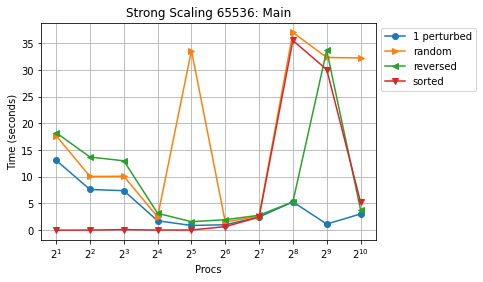

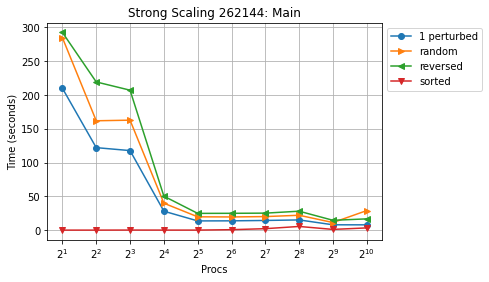

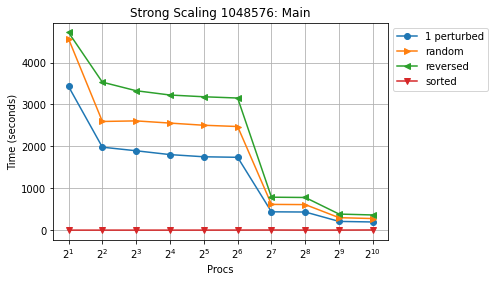

KeyError: "None of [MultiIndex([('1 perturbed', 'Avg time/rank')],\n           )] are in the [columns]"

In [34]:
i = 0
for ctk in allctk:
    plot_mpl_inputtypes(
        df=ctk.dataframe[[sorttypes[0]]].loc["main"],
        df1= ctk.dataframe[[sorttypes[1]]].loc["main"],
        df2= ctk.dataframe[[sorttypes[2]]].loc["main"],
        df3= ctk.dataframe[[sorttypes[3]]].loc["main"],
        title=f"Strong Scaling {sizes[i]}: Main",
        xlabel="Procs",
        ylabel="Time (seconds)",
        label1='1 perturbed',
        label2='random',
        label3='reversed',
        label4= 'sorted'
    )
    i += 1

# Plot of 2

In [35]:
# i = 0
# for ctk in allctk:
#     plot_mpl2(
#         df= ctk.dataframe[[temp[1]]].loc["main"],
#         df1= ctk.dataframe[[temp[2]]].loc["main"],
#         title=f"Sorted Weak Scaling {sizes[i]}: Main",
#         xlabel="Threads",
#         ylabel="Time (seconds)",
#         label1='Sample',
#         label2='Merge'
#     )
#     i += 1

## Comp_Large Graphs (for 3 then 2)

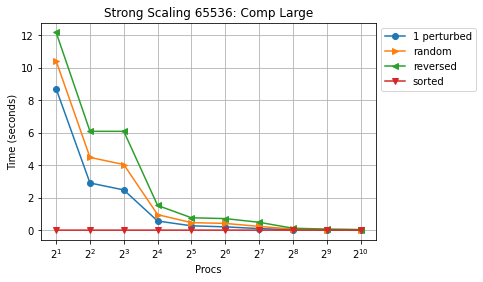

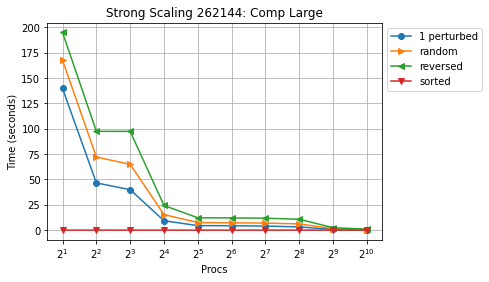

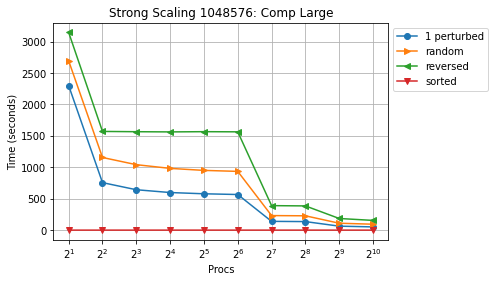

KeyError: "None of [MultiIndex([('1 perturbed', 'Avg time/rank')],\n           )] are in the [columns]"

In [36]:
i = 0
for ctk in allctk:
    plot_mpl_inputtypes(
        df=ctk.dataframe[[sorttypes[0]]].loc["comp_large"],
        df1= ctk.dataframe[[sorttypes[1]]].loc["comp_large"],
        df2= ctk.dataframe[[sorttypes[2]]].loc["comp_large"],
        df3= ctk.dataframe[[sorttypes[3]]].loc["comp_large"],
        title=f"Strong Scaling {sizes[i]}: Comp Large",
        xlabel="Procs",
        ylabel="Time (seconds)",
        label1='1 perturbed',
        label2='random',
        label3='reversed',
        label4= 'sorted'
    )
    i += 1

## Comm Graphs (for 3 then 2)

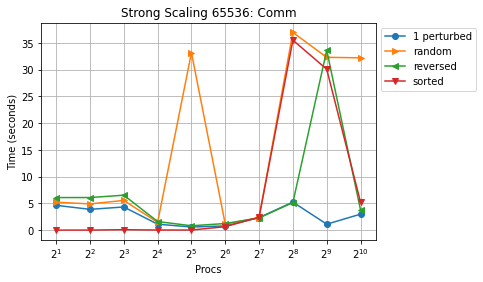

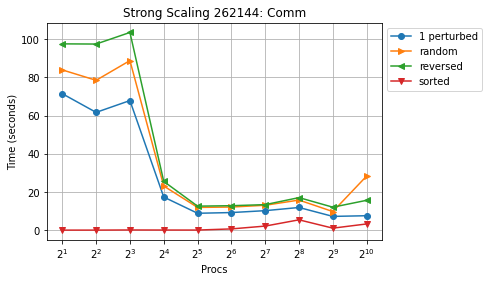

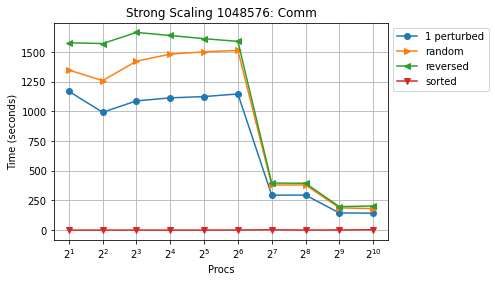

KeyError: "None of [MultiIndex([('1 perturbed', 'Avg time/rank')],\n           )] are in the [columns]"

In [37]:
i = 0
for ctk in allctk:
    plot_mpl_inputtypes(
        df=ctk.dataframe[[sorttypes[0]]].loc["comm"],
        df1= ctk.dataframe[[sorttypes[1]]].loc["comm"],
        df2= ctk.dataframe[[sorttypes[2]]].loc["comm"],
        df3= ctk.dataframe[[sorttypes[3]]].loc["comm"],
        title=f"Strong Scaling {sizes[i]}: Comm",
        xlabel="Procs",
        ylabel="Time (seconds)",
        label1='1 perturbed',
        label2='random',
        label3='reversed',
        label4= 'sorted'
    )
    i += 1